In [1]:
import numpy as np 
import pandas as pd 
import sklearn

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.data.shape)

(20640, 8)


In [3]:
df2 = pd.DataFrame(housing.data, columns=housing.feature_names)
df2.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
x = df2
y = housing.target

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression


pipe = Pipeline([('Linear', LinearRegression())])
pipe.fit(x_train, y_train)

Pipeline(steps=[('Linear', LinearRegression())])

In [9]:
y_pred = pipe.predict(x_test)

/tmp/ipykernel_10031/615063911.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


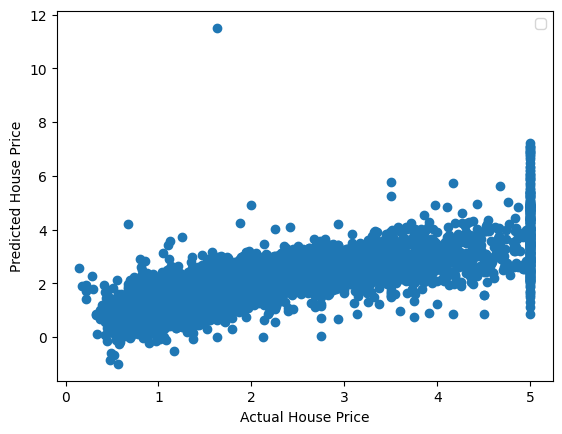

In [10]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.legend()
plt.show()

In [11]:
from sklearn.metrics import mean_squared_error
mse_house_lr = mean_squared_error(y_test, y_pred)
print(f"Linear Regression MSE : {mse_house_lr}")

Linear Regression MSE : 0.5305677824766758


In [12]:
from sklearn.metrics import root_mean_squared_error
rmse_house_lr = root_mean_squared_error(y_test, y_pred) 
print(f"Linear Regression MSE : {rmse_house_lr}")

Linear Regression MSE : 0.7284008391515456


In [18]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
pipe_sgd = Pipeline([('Scaler', StandardScaler()), ('sgd', SGDRegressor(max_iter=1000000, alpha=0.00001, learning_rate='invscaling', random_state=42 ))])
pipe_sgd.fit(x_train, y_train)
y_pred_sgd = pipe_sgd.predict(x_test)

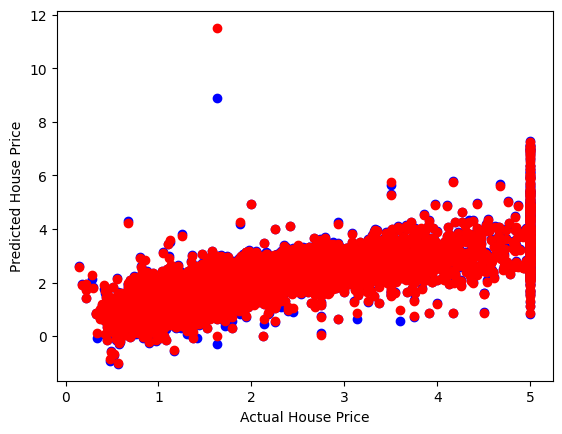

In [19]:
plt.scatter(y_test, y_pred_sgd, color='blue')
plt.scatter(y_test, y_pred, color='red')
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.show()

In [20]:
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
print(f"Mean Squared Error : {mse_sgd}")

Mean Squared Error : 0.5234407287802035


In [22]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipe, x, y, cv=3, scoring='neg_mean_absolute_percentage_error')
scores

array([-0.38556901, -0.28635531, -0.31117856])